In [2]:
# inspired by: https://jakevdp.github.io/PythonDataScienceHandbook/05.11-k-means.html

import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min, classification_report, confusion_matrix

n_clusters = 3        # or 4 or 5 
noise_level = 1.20    # 
random_state = 2


def GenerateData():
    return make_blobs(n_samples=300, 
                      centers=n_clusters, 
                      cluster_std=noise_level, 
                      random_state=random_state);

# Make and visualize Training data

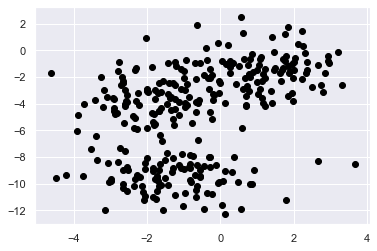

In [3]:

# Generate the training data and true classification.
X_train, y_train = GenerateData();
plt.scatter(X_train[:, 0], X_train[:, 1], c="black")


# Train the Model

In [23]:

kmeans = KMeans(n_clusters=n_clusters)
kmeans.fit(X_train);

centers = kmeans.cluster_centers_


### Find the Clusters

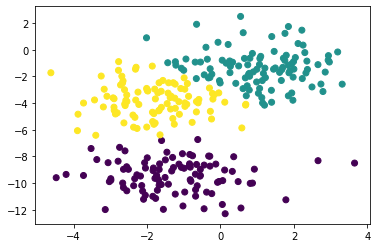

In [24]:

y_predict_train_temp = kmeans.predict(X_train)

# Correction for random cluster number
closest, _ = pairwise_distances_argmin_min(centers, X_train)
lot = [y_train[i] for i in closest]
y_predict_train =  [lot[i] for i in y_predict_train_temp]

plt.scatter(X_train[:, 0], X_train[:, 1], c=y_predict_train, cmap='viridis')


### Qualify Performance

In [25]:

# Since we know the solution, 
print(classification_report(y_train, y_predict_train))


              precision    recall  f1-score   support

           0       1.00      0.99      0.99       100
           1       0.93      0.97      0.95       100
           2       0.96      0.93      0.94       100

    accuracy                           0.96       300
   macro avg       0.96      0.96      0.96       300
weighted avg       0.96      0.96      0.96       300



# Lets try it out on new data

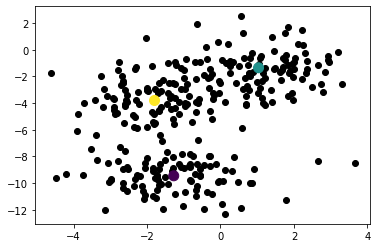

In [26]:

# Generate the new data to see how well the model performs.
X_test, y_test = GenerateData();

plt.scatter(X_test[:, 0], X_test[:, 1], c="black")
plt.scatter(centers[:, 0], centers[:, 1], c=lot, cmap='viridis', s=100)


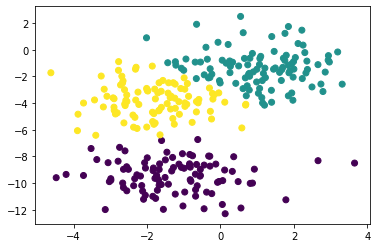

In [27]:

y_predict_test_temp = kmeans.predict(X_test);
y_predict_test = [lot[i] for i in y_predict_test_temp];


plt.scatter(X_test[:, 0], X_test[:, 1], c=y_predict_test, cmap='viridis')


# How well did it work?

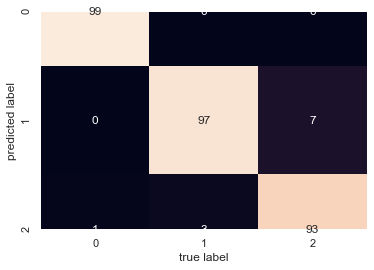

In [35]:


mat = confusion_matrix(y_train, y_predict_train)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
            # xticklabels=digits.target_names,
           # yticklabels=digits.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');

In [28]:

print(classification_report(y_predict_test, y_test))


              precision    recall  f1-score   support

           0       0.99      1.00      0.99        99
           1       0.97      0.93      0.95       104
           2       0.93      0.96      0.94        97

    accuracy                           0.96       300
   macro avg       0.96      0.96      0.96       300
weighted avg       0.96      0.96      0.96       300



### Visualize the misclassifications 

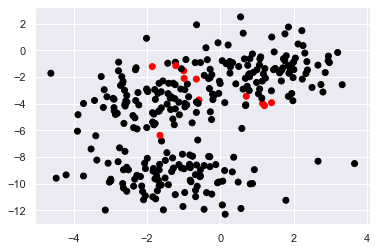

In [37]:

x = X_test[:, 0]
y = X_test[:, 1]

matches = [y_predict_test[i] == y_test[i] for i in range(len(x))]
colors = ['black' if match else 'red' for match in matches]

# to do, only color misclassifications in correct color
wrongs = [y_predict_test[i] != y_test[i] for i in range(len(x))]

#plt.scatter(centers[:, 0], centers[:, 1], c=lot, cmap='viridis', s=2000, alpha=.5)
plt.scatter(x, y, c=colors)
    